## Exploratory Data Analysis (EDA) for Cybersecurity Intrusion Detection-KDD-Cup-1999

### 1. Data loading and dataset overview

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

with open("../YOUR-DATA-IS-MINE/Data/kddcup_names.csv",'r') as f:
    content = f.read()
    print(content)


back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

### 1.1 Column names and meaning

The KDD Cup 1999 dataset, used for network intrusion detection, contains numerous features (columns) representing different aspects of network traffic. Each column name has a specific meaning related to network connections and behaviors. 

In [58]:
cols = []
content = content.split("\n")[1:]
for c in content:
    if len(c) > 1:
        print(c.split(":")[0])
        cols.append(c.split(":")[0])
cols.append("target")

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


In [59]:
cols

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [60]:
len(cols)

42

In [61]:
with open("../YOUR-DATA-IS-MINE/Data/training_attack_types.csv",'r') as f: 
 print(f.read())

 back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l



In [62]:
path = "../YOUR-DATA-IS-MINE/Data/corrected.csv"
data = pd.read_csv(path ,names=cols, header=None)
print(data) 

        duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0              0           udp  private   SF        105        146     0   
1              0           udp  private   SF        105        146     0   
2              0           udp  private   SF        105        146     0   
3              0           udp  private   SF        105        146     0   
4              0           udp  private   SF        105        146     0   
...          ...           ...      ...  ...        ...        ...   ...   
311024         0           udp  private   SF        105        147     0   
311025         0           udp  private   SF        105        147     0   
311026         0           udp  private   SF        105        147     0   
311027         0           udp  private   SF        105        147     0   
311028         0           udp  private   SF        105        147     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0                    0 

In [63]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [64]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack


In [65]:
attack_types = {
    'normal': 'normal',
    'neptune': 'dos',
    'satan': 'probe',
    'smurf': 'dos',
    'ipsweep': 'probe',
    'portsweep': 'probe',
    'nmap': 'probe',
    'guess_passwd': 'r2l',
    'back': 'dos',
    'mscan': 'probe',
    'warezmaster': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'apache2': 'dos',
    'processtable': 'dos',
    'saint': 'probe',
    'snmpguess': 'probe',
    'mailbomb': 'dos',
    'pod': 'dos',
    'snmpgetattack': 'dos',
    'httptunnel': 'r2l',
    'buffer_overflow': 'u2r',
    'land': 'dos',
    'multihop': 'r2l',
    'rootkit': 'u2r',
    'named': 'r2l',
    'ps': 'u2r',
    'sendmail': 'r2l',
    'imap': 'r2l',
    'xterm': 'r2l',
    'loadmodule': 'u2r',
    'ftp_write': 'r2l',
    'xlock': 'r2l',
    'phf': 'r2l',
    'perl': 'u2r',
    'xsnoop': 'r2l',
    'udpstorm': 'dos',
    'spy': 'r2l',
    'worm': 'r2l',
    'sqlattack': 'u2r'
}

## Reading dataset


In [66]:
column_names=[]
for line in data:
        column_names.append(line.split(':')[0])

In [67]:
df=pd.read_csv('../YOUR-DATA-IS-MINE/Data/kddcup.data.corrected.csv', names=column_names, header=None)

In [68]:
f=open("../YOUR-DATA-IS-MINE/Data/kddcup_names.csv",'r')
data=f.readlines()[1:]

In [69]:
column_names=[]
for line in data:
    column_names.append(line.split(':')[0])

In [70]:
column_names.append('target')
f.close()

In [71]:
f=open("../YOUR-DATA-IS-MINE/Data/training_attack_types.csv",'r')
data=f.readlines()

In [72]:
df.target.unique()

array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
       'smurf', 'guess_passwd', 'pod', 'teardrop', 'portsweep', 'ipsweep',
       'land', 'ftp_write', 'back', 'imap', 'satan', 'phf', 'nmap',
       'multihop', 'warezmaster', 'warezclient', 'spy', 'rootkit'],
      dtype=object)

In [73]:
attack_types_mapping={'normal':'normal'}
for line in data:
    k, v= line.split()
    attack_types_mapping[k]=v
    print(k,v)

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


In [74]:
f.close()

In [75]:
df=pd.read_csv('../YOUR-DATA-IS-MINE/Data/kddcup.data.corrected.csv',names=column_names , header=None)

In [76]:
df['Attack Type'] = df.target.apply(lambda r:attack_types [r])

In [77]:
df['Attack Type'].value_counts()

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

In [78]:
original_df = df.copy()
df.drop_duplicates(inplace=True)

In [79]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal,normal


In [80]:
df['Attack Type'].unique()



array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [81]:
df.target.unique().tolist()

['normal',
 'buffer_overflow',
 'loadmodule',
 'perl',
 'neptune',
 'smurf',
 'guess_passwd',
 'pod',
 'teardrop',
 'portsweep',
 'ipsweep',
 'land',
 'ftp_write',
 'back',
 'imap',
 'satan',
 'phf',
 'nmap',
 'multihop',
 'warezmaster',
 'warezclient',
 'spy',
 'rootkit']

In [82]:
df["target"].value_counts()

target
normal             812814
neptune            242149
satan                5019
ipsweep              3723
portsweep            3564
smurf                3007
nmap                 1554
back                  968
teardrop              918
warezclient           893
pod                   206
guess_passwd           53
buffer_overflow        30
warezmaster            20
land                   19
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

In [83]:
df.shape

(1074992, 43)

In [84]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074992 entries, 0 to 4898430
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1074992 non-null  int64  
 1   protocol_type                1074992 non-null  object 
 2   service                      1074992 non-null  object 
 3   flag                         1074992 non-null  object 
 4   src_bytes                    1074992 non-null  int64  
 5   dst_bytes                    1074992 non-null  int64  
 6   land                         1074992 non-null  int64  
 7   wrong_fragment               1074992 non-null  int64  
 8   urgent                       1074992 non-null  int64  
 9   hot                          1074992 non-null  int64  
 10  num_failed_logins            1074992 non-null  int64  
 11  logged_in                    1074992 non-null  int64  
 12  num_compromised              1074992 non-null  

In [86]:
print('The no of data points are:',df.shape[0])
print('='*40)
print('The no of cols are:',df.shape[1])
print('='*40)
print('Some of the cols are:',cols[:10])

The no of data points are: 1074992
The no of cols are: 43
Some of the cols are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


### 1.2 Missing Data: 

 Hence there are no missing values.

In [87]:
# Check for rows with any missing values
missing_rows = df[df.isnull().any(axis=1)]

# Print the number of rows with any missing values
num_missing_rows = missing_rows.shape[0]
print('Number of rows with any missing values:', num_missing_rows)

# Print the columns with missing values and their counts
missing_values = df.isnull().sum()
print('Columns with missing values and their counts:')
print(missing_values[missing_values > 0])

# Print the rows with missing values
print('Rows with missing values:')
print(missing_rows)

Number of rows with any missing values: 0
Columns with missing values and their counts:
Series([], dtype: int64)
Rows with missing values:
Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, target, Attack Type]
Index: []

[0 rows x 43 columns]


In [88]:
df.isnull().sum()



duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### Checking for DUPLICATE values

In [91]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type


In [92]:
duplicateRowsDF = original_df[original_df.duplicated()]
duplicateRowsDF.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
1769,0,tcp,http,SF,212,24572,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,normal
1770,0,tcp,http,SF,213,25519,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,normal
1771,0,tcp,http,SF,214,1108,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,normal
1881,0,tcp,http,SF,292,1600,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,normal
1882,0,tcp,http,SF,291,1651,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,normal


In [93]:
df['Attack Type'].value_counts()

Attack Type
normal    812814
dos       247267
probe      13860
r2l          999
u2r           52
Name: count, dtype: int64

## Categorical Feature distribution

#### The KDD Cup 1999 dataset file contains a sample of the full dataset and includes several important categorical features. Here is a detailed breakdown of the distributions and explanations 

In [94]:
df.describe(include=['object'])

,protocol_type,service,flag,target,Attack Type
count,1074992,1074992,1074992,1074992,1074992
unique,3,70,11,23,5
top,tcp,http,SF,normal,normal
freq,978540,580507,786840,812814,812814


In [95]:
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')
cate_cols

['service', 'flag', 'protocol_type']


1. **protocol_type** :
This feature describes the protocol used in the connection. The main protocols and their distributions in the dataset are:

*tcp* (Transmission Control Protocol): The most commonly used protocol in network communications, used for reliable, ordered, and error-checked delivery of a stream of data.

*udp* (User Datagram Protocol): A simpler message-based connectionless protocol. It is often used in applications where speed is more critical than reliability.

*icmp* (Internet Control Message Protocol): Used for diagnostic or control purposes, such as error messages and network debugging.

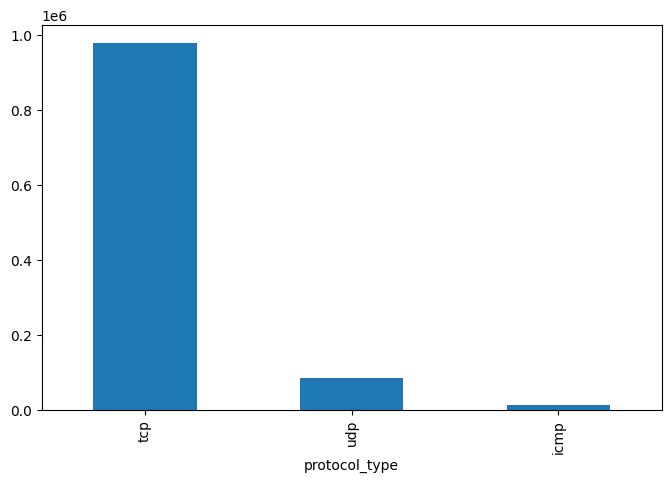

In [96]:
fig = plt.figure()
fig = df['protocol_type'].value_counts().plot(figsize=(8, 5), kind="bar")
plt.show()

2. **service**

This feature identifies the network service on the destination, such as HTTP, FTP, etc. The service feature is quite diverse, with many different possible values. Some common services include:

*http*: The Hypertext Transfer Protocol, used for web traffic.

*smtp*: Simple Mail Transfer Protocol, used for email transmission.

*ftp_data*: File Transfer Protocol, used for transferring files.

*other*: Various other services.

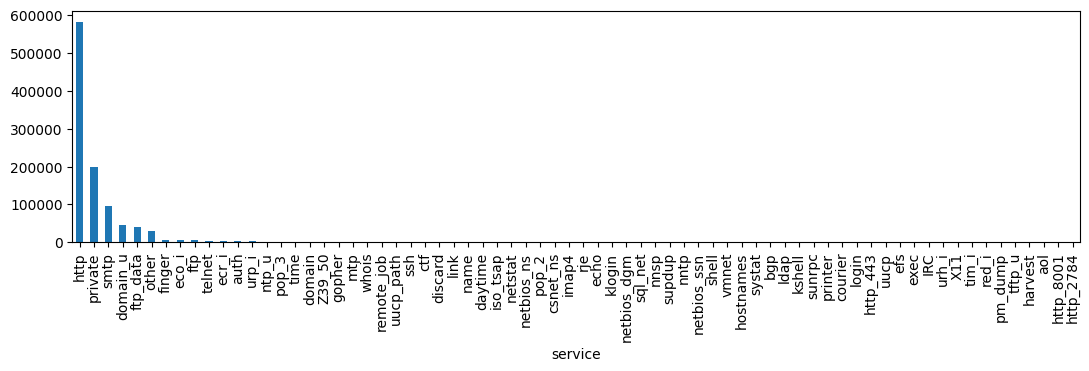

In [97]:
fig = plt.figure()
fig = df['service'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

3. *flag*
This feature indicates the status of the connection. The flag values give information about the state of the connection. Some common flags include:

SF (Successful connection): Connection established and terminated successfully.

S0 (Connection attempt seen, no reply): Connection attempt made but no response received.


REJ (Connection attempt rejected): Connection attempt rejected by the destination.


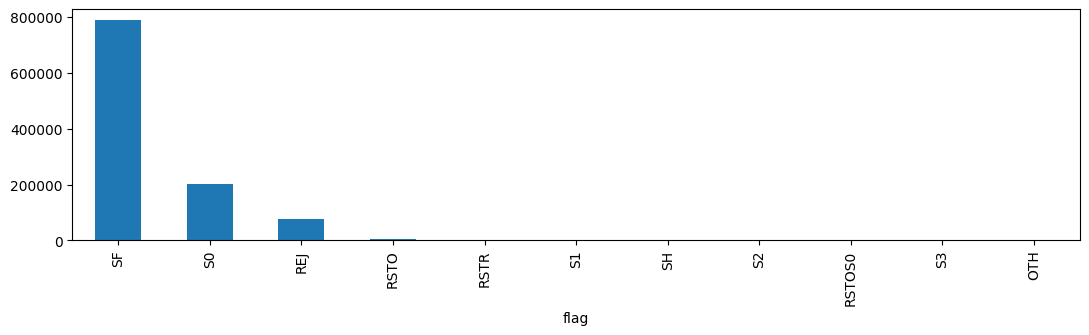

In [98]:
fig = plt.figure()
fig = df['flag'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

### Summary
The distributions of the protocol_type, service, and flag features in the KDD Cup 1999 dataset reflect the diversity and typical usage patterns of network traffic, making it a valuable dataset for training and evaluating network intrusion detection systems. The high percentage of tcp connections, the prevalence of http service, and the variety of connection flags provide a comprehensive snapshot of network behavior during the data collection period.

In [99]:
fig = plt.figure(figsize=(3, 3))
df["logged_in"].value_counts()

logged_in
1    677370
0    397622
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

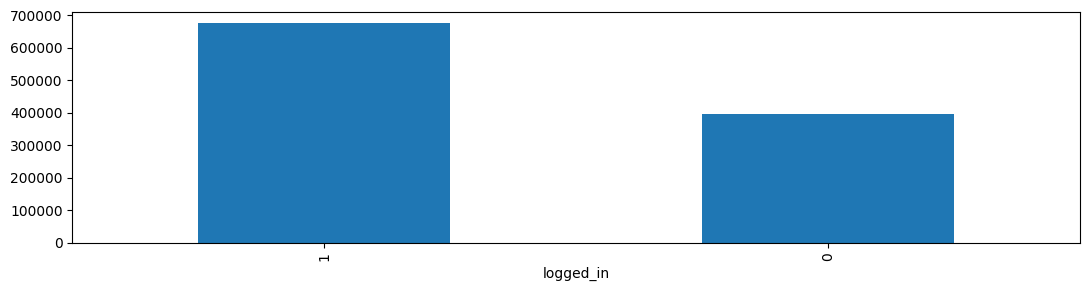

In [100]:
fig = plt.figure()
fig = df['logged_in'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()


The logged_in feature in the KDD Cup 1999 dataset is a binary categorical feature that indicates whether the login was successfully completed during a network connection attempt. This feature helps in distinguishing between successful and unsuccessful login attempts, which is crucial for identifying potential security incidents such as unauthorized access attempts or login brute force attacks.

Explanation
logged_in = 1 (Successful Login): This indicates that the login was successfully completed. In the context of a network connection, it means that the authentication process was completed successfully, allowing the user or process to access the system or service.

logged_in = 0 (Unsuccessful Login): This indicates that the login attempt failed. This could be due to incorrect credentials, the user account being locked, network issues preventing authentication, or other reasons.



### TARGET FEATURE DISTRIBUTION

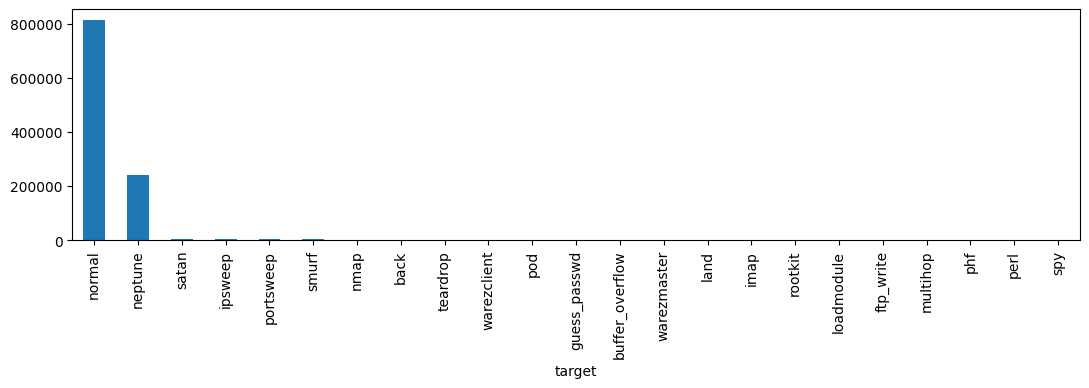

In [101]:
fig = plt.figure()
fig = df['target'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

## Attack Types

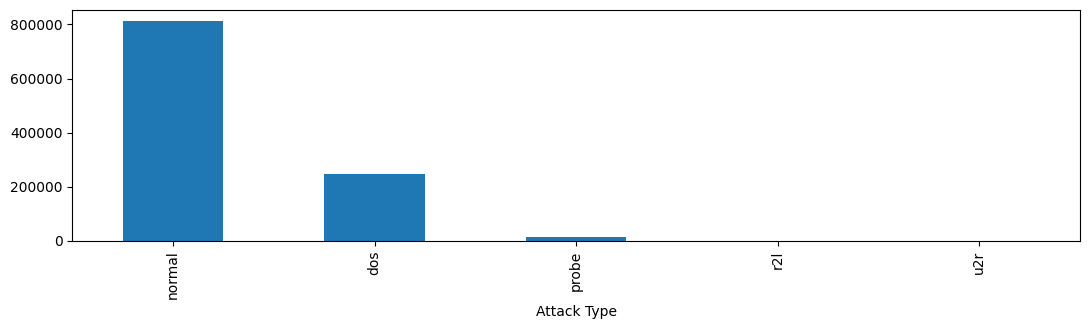

In [102]:
fig = plt.figure()
fig = df['Attack Type'].value_counts().plot(figsize=(13, 3), kind="bar")
                                          
plt.show()

Denial-of-service(DOS) :-
 
A Denial-of-Service (DoS) attack is an attack meant to shut down a machine or network, making it inaccessible to its intended users. DoS attacks accomplish this by flooding the target with traffic, or sending it information that triggers a crash.e.g. syn flood;
 
Remote 2 Local(R2L) attack:- Remote to local attack (r2l) has been widely known to be launched by an attacker to gain unauthorized access to a victim machine in the entire network.
 
User to root attack (U2R) attack:-This attack is usually launched for illegally obtaining the root’s privileges when legally accessing a local machine. , e.g. guessing password, various "buffer overflow" attacks;
 
Probing:-Probing is an attack in which the hacker scans a machine or a. networking device in order to determine weaknesses or. vulnerabilities that may later be exploited so as to. compromise the system. e.g., port scanning.